### ANN Regression
1) The Activation function used in hidden layer - Relu,LeakyRelu<br>
2) The Activation function used in output layer - linear<br>
3) Optimizer - adam, rmsprop, sgd<br>
4) Loss function - mse, mae<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_price.csv')
df.head()

,Unnamed: 0,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [3]:
df.shape
# 1435 - no of rows, 9 - no of columns

(1435, 9)

In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors',
       'Price'],
      dtype='object')

In [5]:
df['Unnamed: 0'].nunique()

1435

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [7]:
df.isnull().sum()

Age         0
KM          0
Weight      0
HP          0
MetColor    0
CC          0
Doors       0
Price       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Age         float64
KM            int64
Weight      float64
HP            int64
MetColor      int64
CC          float64
Doors         int64
Price         int64
dtype: object

In [10]:
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [11]:
# df.iloc[:,:-1].head()

In [12]:
x = df.iloc[:,:-1]  # x = df.drop('Price',axis=1)
y = df['Price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1435, 7)
(1435,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 7)
(359, 7)
(1076,)
(359,)


#### Build the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

#### Model Architecture - M1

In [16]:
m1 = Sequential()                                  # Input layer has 7 neruons
m1.add(Dense(21,activation='relu',input_dim=7))    # H1 - has 21 neurons
m1.add(Dense(14,activation='relu'))                # H2 - has 14 neurons
m1.add(Dense(7,activation='relu'))                 # H3 - has 7 neurons
m1.add(Dense(1))                                   # Output layer has 1 neuron - linear activation function is used 

m1.compile(optimizer='adam',loss='mse' )

In [17]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
34/34 [==============================] - 2s 16ms/step - loss: 197565456.0000 - val_loss: 109322552.0000
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 101693976.0000 - val_loss: 90383144.0000
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 80289832.0000 - val_loss: 67921472.0000
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: 61024556.0000 - val_loss: 57300160.0000
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 56193672.0000 - val_loss: 57357396.0000
Epoch 6/50
34/34 [==============================] - 0s 4ms/step - loss: 56215956.0000 - val_loss: 57118964.0000
Epoch 7/50
34/34 [==============================] - 0s 4ms/step - loss: 55953272.0000 - val_loss: 57091348.0000
Epoch 8/50
34/34 [==============================] - 0s 5ms/step - loss: 55829372.0000 - val_loss: 56859052.0000
Epoch 9/50
34/34 [==============================] - 0s 5ms/step - loss: 55656360.0000 - val_loss: 56

In [18]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,val_loss,Epochs
45,5217057.5,4915876.5,45
46,5557669.0,4950165.0,46
47,5205052.0,4828989.5,47
48,5005947.0,5947925.0,48
49,4993515.0,5024845.5,49


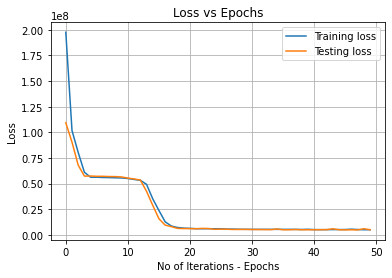

In [19]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('No of Iterations - Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid()
plt.show()

In [20]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

12/12 [==============================] - 0s 3ms/step
[[ 7392.434 ]
 [14166.011 ]
 [ 7101.8735]
 [ 8358.564 ]
 [ 7644.2363]
 [ 6219.231 ]
 [ 9170.216 ]
 [ 8842.549 ]
 [10376.719 ]
 [10803.66  ]
 [11021.868 ]
 [11524.793 ]
 [12006.934 ]
 [ 8748.941 ]
 [16750.086 ]
 [ 7242.813 ]
 [ 9165.594 ]
 [ 7101.5854]
 [16235.474 ]
 [ 5823.586 ]
 [13415.386 ]
 [ 8802.238 ]
 [ 8495.808 ]
 [ 9709.387 ]
 [ 8255.329 ]
 [ 9375.204 ]
 [13158.274 ]
 [ 8041.9893]
 [10269.725 ]
 [11902.006 ]
 [ 7873.895 ]
 [17120.455 ]
 [14318.957 ]
 [ 9911.624 ]
 [ 9869.621 ]
 [ 8375.92  ]
 [10378.15  ]
 [11145.952 ]
 [13504.247 ]
 [10882.353 ]
 [13863.473 ]
 [ 8191.6265]
 [ 8840.192 ]
 [11628.786 ]
 [12250.003 ]
 [ 9889.314 ]
 [ 9665.209 ]
 [ 9337.682 ]
 [ 9137.581 ]
 [ 6672.108 ]
 [10516.727 ]
 [12498.168 ]
 [ 7786.0933]
 [11886.462 ]
 [12243.908 ]
 [ 8883.177 ]
 [12638.984 ]
 [16639.236 ]
 [10661.821 ]
 [11684.514 ]
 [ 8443.613 ]
 [12548.159 ]
 [11042.16  ]
 [ 7411.4956]
 [13912.533 ]
 [ 8172.8413]
 [14557.59  ]
 [11612.1

In [21]:
print(y_test.shape)
print(ypred_m1.shape)

(359,)
(359, 1)


In [22]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':[*ypred_m1]})
res1.head()


,y_test,y_pred
632,9450,[7392.434]
99,17450,[14166.011]
1090,8250,[7101.8735]
1165,7950,[8358.564]
642,10950,[7644.2363]


In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mse = mean_squared_error(y_test,ypred_m1)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m1)) 
mae = mean_absolute_error(y_test,ypred_m1)
print('MSE',mse)  # 5166799.5
print('RMSE',rmse)
print('MAE',mae)

MSE 5024846.10394046
RMSE 2241.6168503873405
MAE 1662.9749942875173


### EarlyStopping Callbacks

In [25]:
from tensorflow.python.keras.callbacks import EarlyStopping

In [26]:
es = EarlyStopping(monitor='val_loss',patience=5)

In [27]:
m2 = Sequential()                                  # Input layer has 7 neruons
m2.add(Dense(21,activation='relu',input_dim=7))    # H1 - has 21 neurons
m2.add(Dense(14,activation='relu'))                # H2 - has 14 neurons
m2.add(Dense(7,activation='relu'))                 # H3 - has 7 neurons
m2.add(Dense(1))                                   # Output layer has 1 neuron - linear activation function is used 

m2.compile(optimizer='adam',loss='mse')

In [28]:
h2 = m2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[es])

Epoch 1/50
34/34 [==============================] - 1s 12ms/step - loss: 57312924.0000 - val_loss: 57167256.0000
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 55720564.0000 - val_loss: 57671564.0000
Epoch 3/50
34/34 [==============================] - 0s 10ms/step - loss: 54841880.0000 - val_loss: 55077156.0000
Epoch 4/50
34/34 [==============================] - 0s 7ms/step - loss: 52031136.0000 - val_loss: 49203896.0000
Epoch 5/50
34/34 [==============================] - 0s 5ms/step - loss: 46828080.0000 - val_loss: 46583704.0000
Epoch 6/50
34/34 [==============================] - 0s 6ms/step - loss: 39218164.0000 - val_loss: 32581182.0000
Epoch 7/50
34/34 [==============================] - 0s 5ms/step - loss: 26403340.0000 - val_loss: 19927672.0000
Epoch 8/50
34/34 [==============================] - 0s 6ms/step - loss: 15672015.0000 - val_loss: 10693663.0000
Epoch 9/50
34/34 [==============================] - 0s 10ms/step - loss: 9555548.0000 - val_loss: 6950

In [29]:
r2 = pd.DataFrame(h2.history)
r2['Epochs'] = h2.epoch
r2.tail(7)

,loss,val_loss,Epochs
13,5584564.5,5913593.5,13
14,5423642.0,5229751.5,14
15,5909249.5,5233028.5,15
16,5329351.0,5263262.5,16
17,5230749.5,5485671.5,17
18,5196422.0,5967388.0,18
19,5685492.0,5311544.0,19


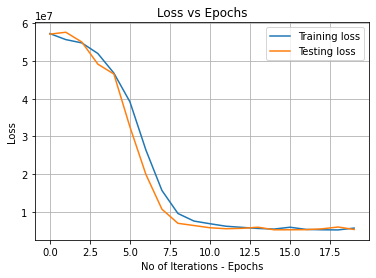

In [30]:
plt.plot(r2['Epochs'],r2['loss'],label='Training loss')
plt.plot(r2['Epochs'],r2['val_loss'],label='Testing loss')
plt.xlabel('No of Iterations - Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid()
plt.show()